Shuohe Ren
U11807977
Boston University cs506    

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from time import time
import pandas as pd

data = np.load('./mnist_data.npy')
labels = np.load('./mnist_labels.npy')


In [12]:
# 3a
scaler= StandardScaler()
scaler.fit(data)
pca=PCA(n_components=len(data[0]))
pca_alldata=pca.fit_transform(data)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

pca = PCA(n_components=len(X_train[0]))
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

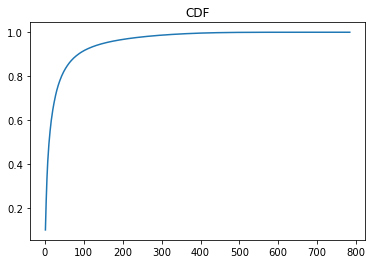

In [14]:
# 3b
explained_var = []
sum_var = 0
pca_explained_var = pca.explained_variance_ratio_
for i in range(len(pca_explained_var)):
    sum_var += pca_explained_var[i]
    explained_var.append(sum_var)
plt.plot(list(range(1, len(data[0]) + 1)), explained_var)
plt.title('CDF')
plt.show()


In [15]:
# 3c
total_component = [200, 300, 400, 500]
for i in range(len(total_component)):
    pca = PCA(n_components=total_component[i])
    pca_train = pca.fit_transform(X_train)
    pca_test = pca.transform(X_test)
    
    neigh = KNeighborsClassifier(n_neighbors=1).fit(pca_train, y_train)
    
    
    y_train_pre = neigh.predict(pca_train)
    
    print(metrics.accuracy_score(y_train, y_train_pre))
    y_test_pre = neigh.predict(pca_test)
    print(metrics.accuracy_score(y_test, y_test_pre))
    
# The train accuracy when 200 principle components is 1
# The test accuracy when 200 principle components is 0.9695238095238096
# The train accuracy when 300 principle components is 1
# The test accuracy when 300 principle components is 0.9683333333333334
# The train accuracy when 400 principle components is 1
# The test accuracy when 400 principle components is 0.9671428571428572
# The train accuracy when 500 principle components is 1
# The test accuracy when 500 principle components is 0.9671428571428572


1.0
0.9688095238095238
1.0
0.9683333333333334
1.0
0.9671428571428572
1.0
0.9671428571428572


<ipython-input-16-b08bbbad7de8>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


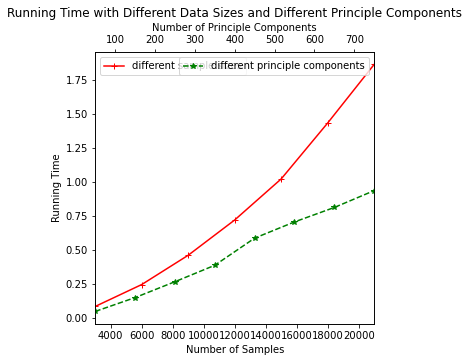

In [16]:
# 3d
fig = plt.figure(figsize=(5, 5))
i = 3000
sample_sizes = []
duration1 = []
while i <= 21000:
    sample_sizes.append(i)
    sub_index = np.random.choice(np.arange(len(data)), i, replace=False)
    sub_data = data[sub_index]
    sub_labels = labels[sub_index]
    start = time()
    neigh = KNeighborsClassifier(n_neighbors=1).fit(sub_data, sub_labels)
    duration1.append(time() - start)
    i += 3000

i = 50
duration2 = []
components = []
while i <= 750:
    components.append(i)
    pca = PCA(n_components=i)
    pca_train = pca.fit_transform(data)
    start = time()
    neigh = KNeighborsClassifier(n_neighbors=1).fit(pca_train, labels)
    duration2.append(time() - start)
    i += 100

plt.title('Running Time with Different Data Sizes and Different Principle Components')
ax = fig.add_subplot(111)
ax2 = ax.twiny()
ax2.set_xlim(min(components), max(components))
ax2.set_xlabel('Number of Principle Components')
ax2.plot(components, duration2, '--*g', label='different principle components')
ax.plot(sample_sizes, duration1, '-+r', label='different sample sizes')
ax.set_xlim(min(sample_sizes), max(sample_sizes))
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Running Time')
ax.legend()
ax2.legend()
plt.show()


In [ ]:
# 3e
duration = []
accuracy = []
x_axis = []
for i in range(len(sample_sizes)):
    sub_index = np.random.choice(np.arange(len(data)), sample_sizes[i], replace=False)
    sub_data = data[sub_index]
    sub_labels = labels[sub_index]
    X_train, X_test, y_train, y_test = train_test_split(sub_data, sub_labels, test_size=0.2, random_state=0)
    for j in range(len(components)):
        x_axis.append(str(sample_sizes[i]) + ',' + str(components[j]))
        pca = PCA(n_components=components[j])
        pca_train = pca.fit_transform(X_train)
        pca_test = pca.transform(X_test)
        start = time()
        neigh = KNeighborsClassifier(n_neighbors=1).fit(pca_train, y_train)
        duration.append(time() - start)
        y_test_pre = neigh.predict(pca_test)
        accuracy.append(metrics.accuracy_score(y_test, y_test_pre))

x_axis_arr = []
duration_arr = []
accuracy_arr = []
for i in range(len(x_axis)):
    x_axis_arr.append([x_axis[i]])
    duration_arr.append([duration[i]])
    accuracy_arr.append([accuracy[i]])
duration_axis = np.hstack((x_axis_arr, duration_arr))
df = pd.DataFrame(np.hstack((duration_axis, accuracy_arr)))
df = df.sort_values(by=[1])
print(df)
df = df.sort_values(by=[2])
print(df)


In [ ]:
# 3f
f = plt.figure(figsize=(5, 5))
i = 1
while i <= 10:
    f.add_subplot(4, 3, i)
    pca = PCA(n_components=i).fit(data, labels)
    plt.imshow(pca.components_[i-1].reshape(28, 28), cmap="gray")
    i += 1
plt.show()